In [46]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from tensorflow import keras
from tensorflow.keras import layers

# Data Loading

In [47]:
data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [48]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [49]:
data = data.drop('Person ID', axis=1)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [51]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [52]:
features = ['Gender', 'Occupation', 'BMI Category','Blood Pressure']

In [53]:
data.corr()

/tmp/ipykernel_32/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


# Data Visualization

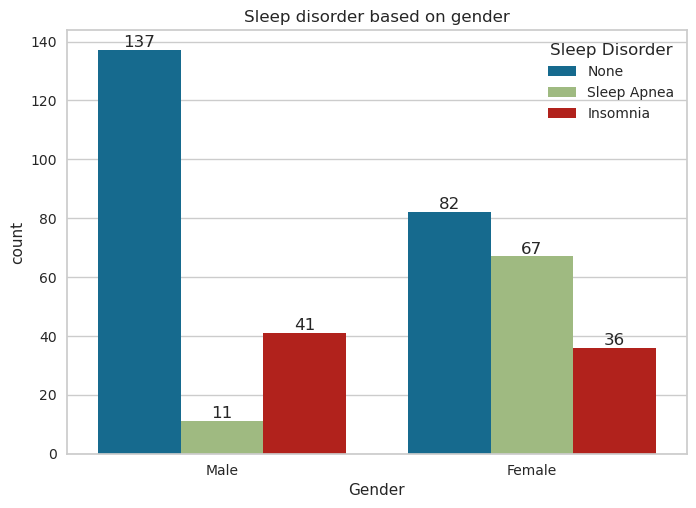

In [54]:
plot = sns.countplot(x=data.Gender, hue=data['Sleep Disorder'])
plot.set(title='Sleep disorder based on gender')
for i in plot.containers:
    plot.bar_label(i)


[Text(0.5, 1.0, 'Stress level based on gender')]

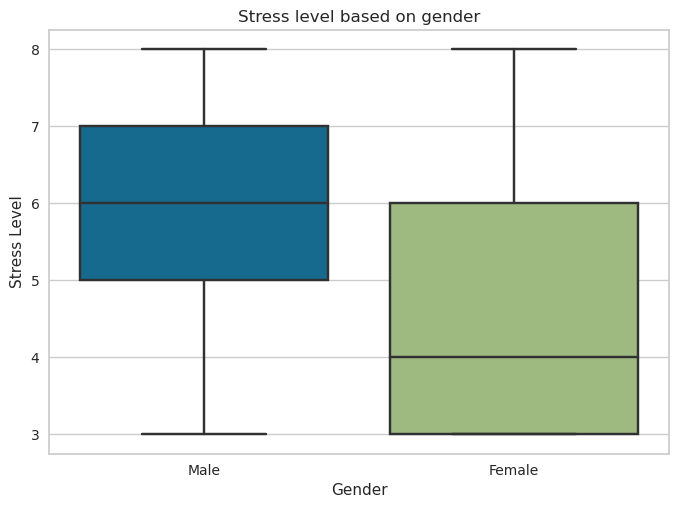

In [55]:
sns.boxplot(x=data.Gender, y=data['Stress Level']).set(title='Stress level based on gender')

[Text(0.5, 1.0, 'Daily steps based on ager')]

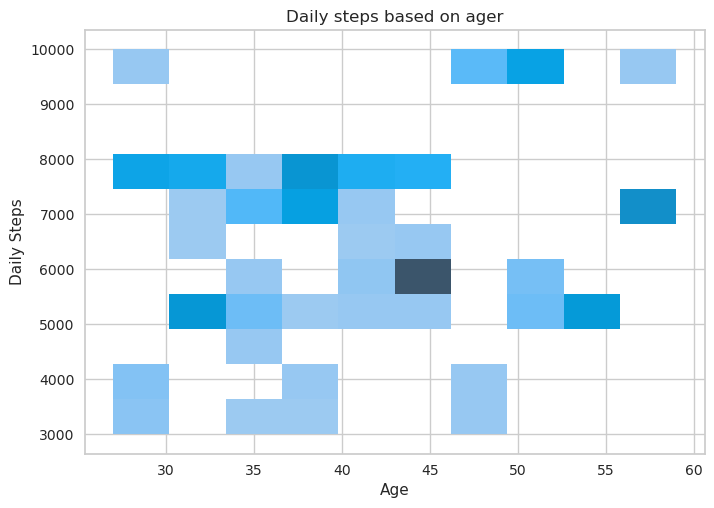

In [56]:
sns.histplot(x=data.Age, y=data['Daily Steps'], kde=False).set(title='Daily steps based on ager')

[Text(0.5, 1.0, 'Sleep duration based on physical activity')]

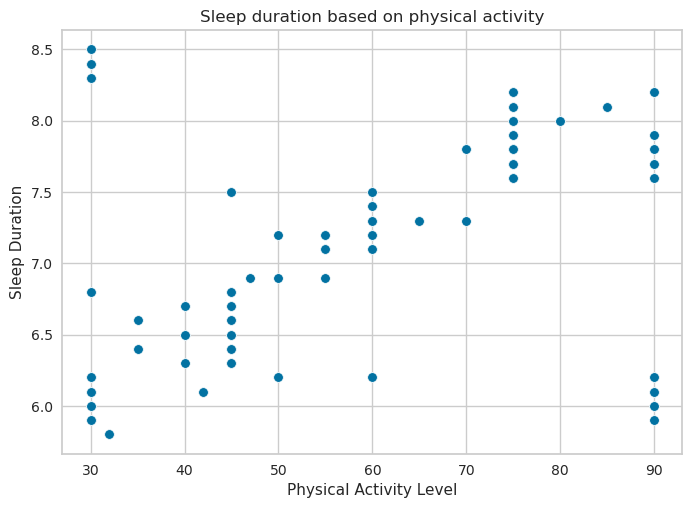

In [57]:
sns.scatterplot(x=data['Physical Activity Level'] ,y=data['Sleep Duration']).set(title='Sleep duration based on physical activity')

# Data Preperation

In [58]:
hot_encoded = pd.get_dummies(data[features])


In [59]:
data_prepared = pd.concat([data,hot_encoded], axis=1)

In [60]:
data_prepared = data_prepared.drop(features, axis=1)

In [61]:
X = data_prepared.drop('Sleep Disorder', axis=1)

In [62]:
y = data_prepared['Sleep Disorder']


In [63]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Knn model

In [64]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)
knn_score_train = knn.score(X_train,y_train)
knn_score_test = knn.score(X_test,y_test)
knn_cross_val_score = cross_val_score(knn,X_test,y_test)
knn_cross_val_score

array([0.73913043, 0.73913043, 1.        , 0.90909091, 0.86363636])

# Decision Tree

In [66]:
tree = DecisionTreeClassifier(max_depth=7, random_state=42)
tree.fit(X_test, y_test)
tree_prediction = tree.predict(X_test)
tree_score_train = tree.score(X_train, y_train)
tree_score_test =tree.score(X_test, y_test)

# Random Forest

In [67]:
random_forest = RandomForestClassifier(n_estimators = 180, min_samples_split = 8, max_depth= 7,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
random_prediction = random_forest.predict(X_test)
random_score_train = random_forest.score(X_train, y_train)
random_score_test = random_forest.score(X_test, y_test)

# Gradient Boost

In [68]:
gradient_boost = GradientBoostingClassifier(max_depth=2, n_estimators=400,
learning_rate=0.1, random_state=42)
gradient_boost.fit(X_test,y_test)
gradient_prediction = gradient_boost.predict(X_test)
gradient_score_train = gradient_boost.score(X_train, y_train)
gradient_score_test = gradient_boost.score(X_test, y_test)

# Models Summary

In [69]:
knn = {'model': 'knn', 'train score': knn_score_train, 'test score': knn_score_test}
tree = {'model': 'decision tree', 'train score': tree_score_train, 'test score': tree_score_test}
random_forest = {'model': 'random forest', 'train score': random_score_train, 'test score': random_score_test}
gradient = {'model': 'gradient boost', 'train score': gradient_score_train, 'test score': gradient_score_test}
total = pd.DataFrame([knn,tree,random_forest,gradient])
total

,model,train score,test score
0,knn,0.881226,0.858407
1,decision tree,0.862069,0.946903
2,random forest,0.927203,0.902655
3,gradient boost,0.869732,0.955752
